# Load Data

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.ticker as mtick

In [3]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Lets check the data types of all the columns 
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total charges should be converted to a numerical data type in order to correctly analyze the data and search for any null values

In [6]:
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After observing the output above, we can see that there are 11 missing values for total charges, lets remove those rows in our datset.

In [7]:
#Removing missing values 
dataset.dropna(inplace = True)

#Remove customer ids since we certainly dont need that.
df2 = dataset.iloc[:,1:]

#Convert the target variable into a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Convert all cateegorical variabeles into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

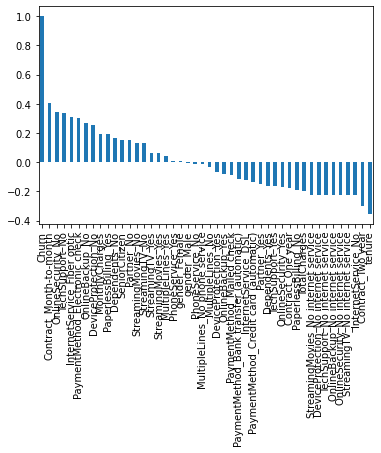

In [16]:
#Lets see the correlation of churn with the remaining features
plt.figure.Figure(figsize=(30,15))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Taking a look at the correlation plot we ca see that month to months contracts and having no online security positively correlates with churn. On the otherhand, Tenue seems to be negatively corelated with churn.

# Data Exploration

We first will explore the dataset further to uncover insights. We will first take a look at demographics, then dive deeper into account information.

Text(0.5, 1.0, 'Gender Distribution')

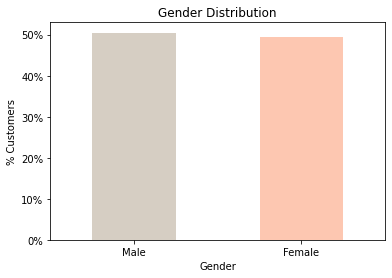

In [40]:
#Gender
colors = ['#d6cec3','#fdc7b1']
ax = (dataset['gender'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

Text(0.5, 1.0, '% of Senior Citizens')

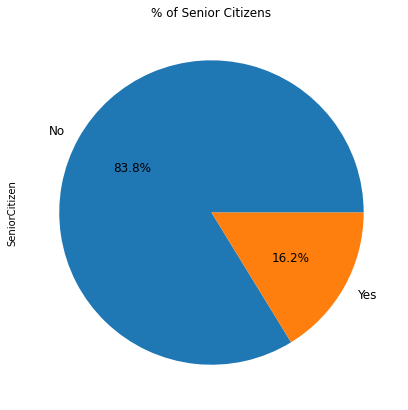

In [43]:
#Seniorirty Statistic
ax = (dataset['SeniorCitizen'].value_counts()*100.0 /len(dataset)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(7,7), fontsize = 12 )                                                                           
ax.set_title('% of Senior Citizens', fontsize = 12)

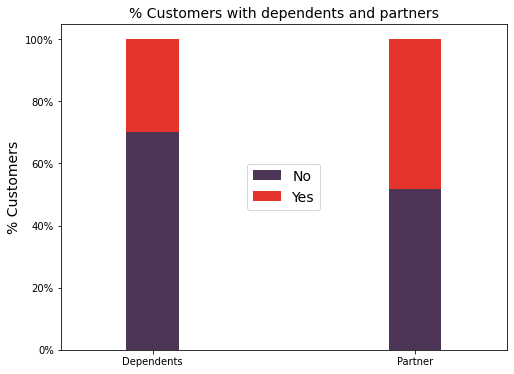

In [64]:
#Percentage of customers with depenents and partners
dfdp=pd.melt(dataset, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

df3 = dfdp.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(dataset)
df3
colors = ['#4D3555','#E4342B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})


In [67]:
partner_dependents = dataset.groupby(['Partner','Dependents']).size().unstack()
partner_dependents

Dependents,No,Yes
Partner,,
No,3280,359
Yes,1653,1740
